# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Task 30-> Some preprocessing Using scikit-learn</p>

# What is Preprocessing?
Preprocessing is a crucial step in data analysis and machine learning that involves transforming raw data into a format that is suitable for analysis and model building. This step typically includes cleaning the data by removing or correcting errors, handling missing values, and ensuring consistency across the dataset. Preprocessing may also involve normalizing or scaling numerical features, encoding categorical variables, and reducing dimensionality to improve computational efficiency. The primary goal of preprocessing is to enhance the quality and usability of the data, enabling more accurate and effective analysis and modeling.

## Tasks:
1. [Standardization](#1)
    -  [Effect](#01)
2. [SimpleImputer](#2)
    -  [Effect](#02)
3. [OneHotEncoder](#3)
    -  [Effect](#03)

## <span style='color:#ff6200'> Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

## <span style='color:#ff6200'> Loading the Dataset</span>

In [2]:
heart_df = pd.read_csv('heart.csv')
selected_columns = ['trestbps', 'thalach','slope', 'sex', 'target']
heart_df = heart_df[selected_columns]

heart_df.head()

,trestbps,thalach,slope,sex,target
0,125,168,2,1,0
1,140,155,0,1,0
2,145,125,0,1,0
3,148,161,2,1,0
4,138,106,1,0,0


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   trestbps  1025 non-null   int64
 1   thalach   1025 non-null   int64
 2   slope     1025 non-null   int64
 3   sex       1025 non-null   int64
 4   target    1025 non-null   int64
dtypes: int64(5)
memory usage: 40.2 KB


In [4]:
X = heart_df.drop(columns = ['target'])
y = heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# <b><span style='color:#ff6200'> Standardization</span>

Standardization is a preprocessing technique used to rescale data to have a mean of zero and a standard deviation of one. It is a common practice in data preprocessing for machine learning and statistical analysis. The primary goal of standardization is to transform data so that features have similar scales, which can help improve the performance of many algorithms, particularly those that are sensitive to feature scaling (e.g., gradient descent-based algorithms, k-nearest neighbors, and support vector machines).

The formula for standardizing a value 𝑥 is:

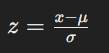

Where:
- 𝑧 is the standardized value.
- 𝑥 is the original value.
- 𝜇 is the mean of the feature.
- 𝜎 is the standard deviation of the feature.

In [5]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X.head()

,trestbps,thalach,slope,sex
0,-0.377636,0.821321,0.995433,0.661504
1,0.479107,0.255968,-2.243675,0.661504
2,0.764688,-1.048692,-2.243675,0.661504
3,0.936037,0.516900,0.995433,0.661504
4,0.364875,-1.874977,-0.624121,-1.511706


## <span style='color:#fcc36d'> Effect on Data </span>

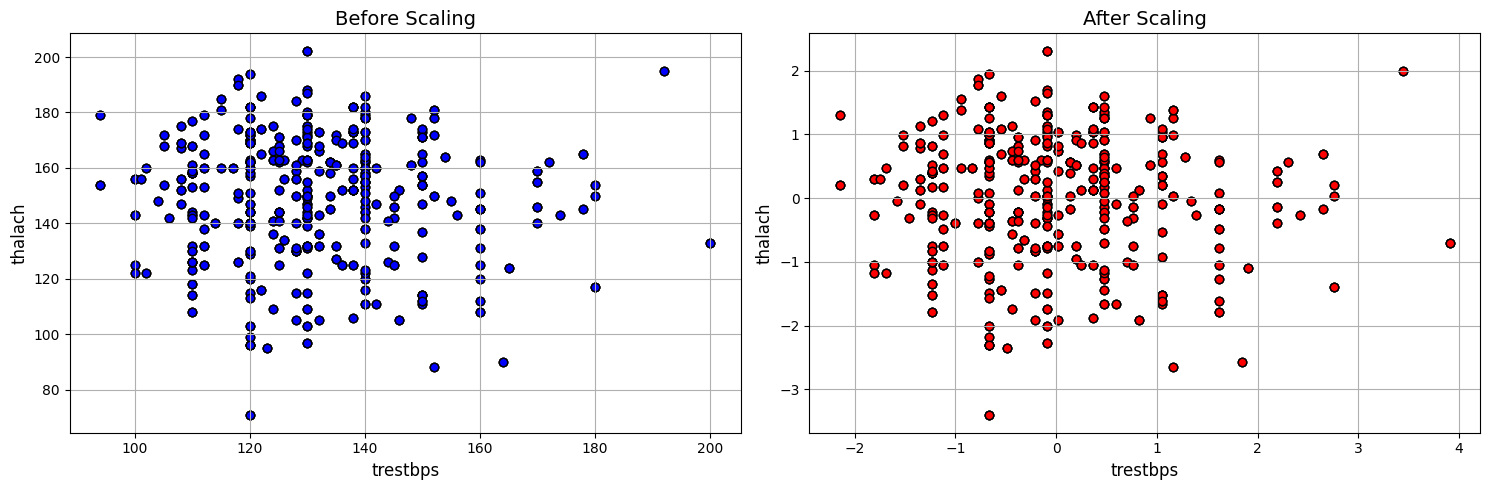

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(X['trestbps'], X['thalach'], c='blue', marker='o', edgecolor='k')
ax1.set_title('Before Scaling', fontsize=14)
ax1.set_xlabel('trestbps', fontsize=12)
ax1.set_ylabel('thalach', fontsize=12)
ax1.grid(True)

ax2.scatter(scaled_X['trestbps'], scaled_X['thalach'], c='red', marker='o', edgecolor='k')
ax2.set_title('After Scaling', fontsize=14)
ax2.set_xlabel('trestbps', fontsize=12)
ax2.set_ylabel('thalach', fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

# <b><span style='color:#ff6200'> Imputation</span>

Simple Imputation is a preprocessing technique used to handle missing data in a dataset. It involves filling in missing values with a specific value, such as the mean, median, or mode of the feature. This method is straightforward and helps in preparing the dataset for machine learning algorithms that cannot handle missing values.

## Methods of Simple Imputation
### Mean Imputation:
Replace missing values with the mean of the non-missing values in the feature.

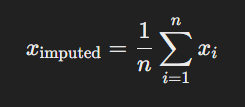

### Median Imputation:

Replace missing values with the median of the non-missing values in the feature.

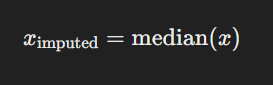


In [7]:
np.random.seed(0)  
num_missing = 109

for column in ['trestbps', 'thalach']:
    indices = np.random.choice(X.index, num_missing, replace=False)
    X.loc[indices, column] = np.nan

In [8]:
imputer = SimpleImputer(strategy='mean')

imputed_X = imputer.fit_transform(X)
imputed_X = pd.DataFrame(imputed_X, columns=X.columns)
imputed_X.head()

,trestbps,thalach,slope,sex
0,125.000000,168.0,2.0,1.0
1,131.837336,155.0,0.0,1.0
2,131.837336,125.0,0.0,1.0
3,148.000000,161.0,2.0,1.0
4,138.000000,106.0,1.0,0.0


## <span style='color:#fcc36d'> Effect on Data </span>

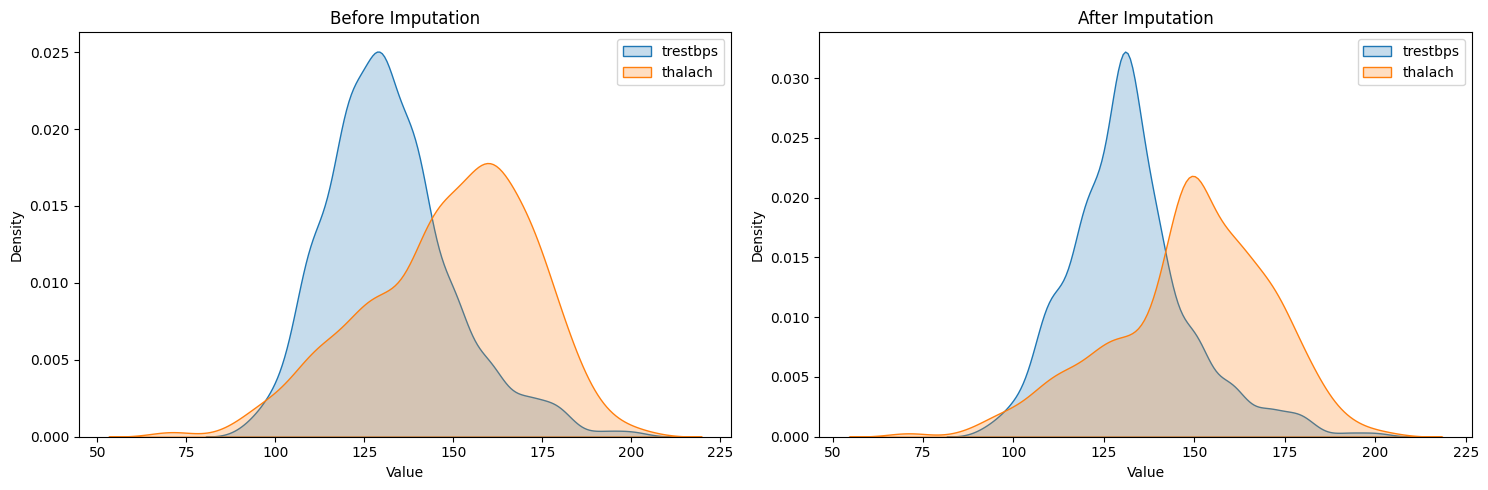

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(X['trestbps'].dropna(), ax=ax1, label='trestbps', shade=True)
sns.kdeplot(X['thalach'].dropna(), ax=ax1, label='thalach', shade=True)
ax1.set_title('Before Imputation')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.legend()

sns.kdeplot(imputed_X['trestbps'], ax=ax2, label='trestbps', shade=True)
sns.kdeplot(imputed_X['thalach'], ax=ax2, label='thalach', shade=True)
ax2.set_title('After Imputation')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

# <b><span style='color:#ff6200'> OneHot Encoding</span>

One-Hot Encoding is a technique used to convert categorical variables into a numerical format that can be used by machine learning algorithms. It transforms each categorical value into a new binary column (0 or 1) indicating the presence of that value. This encoding is particularly useful for algorithms that require numerical input and do not handle categorical data natively.

## How It Works
### Identify Categorical Variables:
- Determine which columns in the dataset are categorical.
### Create Binary Columns:

- For each unique value in the categorical column, create a new column. Each row in these new columns will have a value of 1 if the original categorical value is present and 0 otherwise.
### Replace Categorical Columns:

- Replace the original categorical column with the new binary columns.

In [10]:
data_encoded = pd.get_dummies(X, columns=['sex', 'slope'], prefix=['sex', 'slope'])
data_encoded

,trestbps,thalach,sex_0,sex_1,slope_0,slope_1,slope_2
0,125.0,168.0,False,True,False,False,True
1,NaN,155.0,False,True,True,False,False
2,NaN,125.0,False,True,True,False,False
3,148.0,161.0,False,True,False,False,True
4,138.0,106.0,True,False,False,True,False
...,...,...,...,...,...,...,...
1020,140.0,164.0,False,True,False,False,True
1021,125.0,141.0,False,True,False,True,False
1022,110.0,118.0,False,True,False,True,False
1023,110.0,159.0,True,False,False,False,True
